<a href="https://colab.research.google.com/github/BweepBwop/DSP/blob/main/Z_Transform_Application_TakeHomeQuiz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Z-transform and Region of Convergence**

**Objective:**

The objective of this activity is to help students visualize the poles, zeros, and Region of Convergence (ROC) in the Z-domain for different types of discrete-time systems (causal, anti-causal, and two-sided). Students will modify the transfer function and analyze the behavior of the ROC.

**Instructions:**

**Analyze and Run the Provided Code:**
  
  * The given Python code calculates and plots the poles, zeros, and the ROC of a discrete-time system in the Z-domain.

* Start by running the base code with the default transfer function.

**Task 1: Modify the Transfer Function (Poles/Zeros):**

Change the numerator and denominator coefficients (num and den arrays) to create a different discrete-time system.

Goal: Observe how the location of poles and zeros changes the ROC.

You can refer to the following transfer functions:

**Example 1 (Causal System):**

> Numerator:  $[1,−0.5]$

> Denominator: $[1,−0.8]$

**Example 2 (Anti-Causal System):**

> Numerator: $[1,0.5]$

> Denominator:  $[1,1.5]$

**Example 3 (Two-Sided System):**

> Numerator:
$[1,−0.7,0.2]$

> Denominator:
$[1,0,−0.5]$


**Task 2: Analyze the ROC for Different Systems:**

Modify the code to reflect ROC for different types of systems.

For causal systems, the ROC is outside the outermost pole.

For anti-causal systems, the ROC is inside the innermost pole.

For two-sided systems, the ROC lies between the poles.

Change the shading area in the plot to reflect the correct ROC based on the system type.

**Task 3: Stability Analysis:**

**Goal:** Determine if the system is stable based on the location of poles relative to the unit circle.

**Instructions:** Stability in the Z-domain occurs when all poles lie inside the unit circle $(|z| < 1)$. Indicate on the plot whether the system is stable or unstable.


**Code: Z-transform and ROC Visualization**

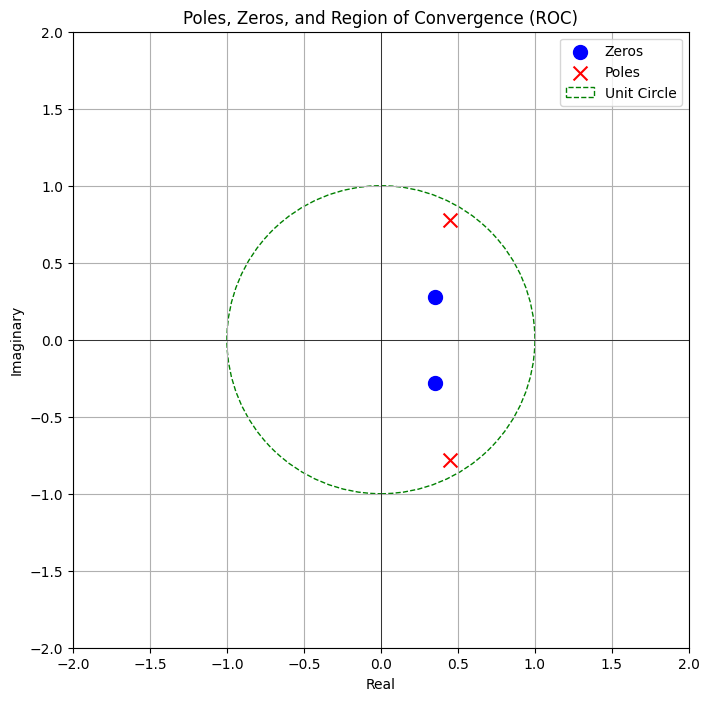

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

# Modify this section to change the transfer function (system type)
# Example: Modify these arrays based on task instructions
num = [1, -0.7, 0.2]  # Numerator coefficients (change as needed)
den = [1, -0.9, 0.81]    # Denominator coefficients (change as needed)

# Create the discrete transfer function system
system = signal.dlti(num, den, dt=1)

# Get poles and zeros of the system
zeros, poles = system.zeros, system.poles

# Plot the poles and zeros
plt.figure(figsize=(8, 8))
plt.scatter(np.real(zeros), np.imag(zeros), label='Zeros', color='blue', s=100, marker='o')
plt.scatter(np.real(poles), np.imag(poles), label='Poles', color='red', s=100, marker='x')

# Plot the unit circle (boundary of ROC in Z-plane)
unit_circle = plt.Circle((0, 0), 1, color='green', fill=False, linestyle='--', label='Unit Circle')
plt.gca().add_artist(unit_circle)

# Define the ROC regions for causal, anti-causal, and two-sided systems
# Example: Change this part based on the system type
# ROC for causal system (outside the outermost pole)
outermost_pole = np.max(np.abs(poles))
roc_circle_causal = plt.Circle((0, 0), outermost_pole, color='yellow', fill=True, alpha=0.2, label='ROC (Causal)')

# ROC for anti-causal system (inside the innermost pole)
innermost_pole = np.min(np.abs(poles))
roc_circle_anticausal = plt.Circle((0, 0), innermost_pole, color='orange', fill=True, alpha=0.2, label='ROC (Anti-causal)')

# Example: Uncomment the ROC region to reflect the system type
# plt.gca().add_artist(roc_circle_causal)   # Uncomment for causal system
# plt.gca().add_artist(roc_circle_anticausal)  # Uncomment for anti-causal system

# Set the axis limits
plt.xlim([-2, 2])
plt.ylim([-2, 2])

# Label the plot
plt.axhline(0, color='black', lw=0.5)
plt.axvline(0, color='black', lw=0.5)
plt.xlabel('Real')
plt.ylabel('Imaginary')
plt.title('Poles, Zeros, and Region of Convergence (ROC)')
plt.legend()
plt.grid(True)
plt.gca().set_aspect('equal')

# Show the plot
plt.show()


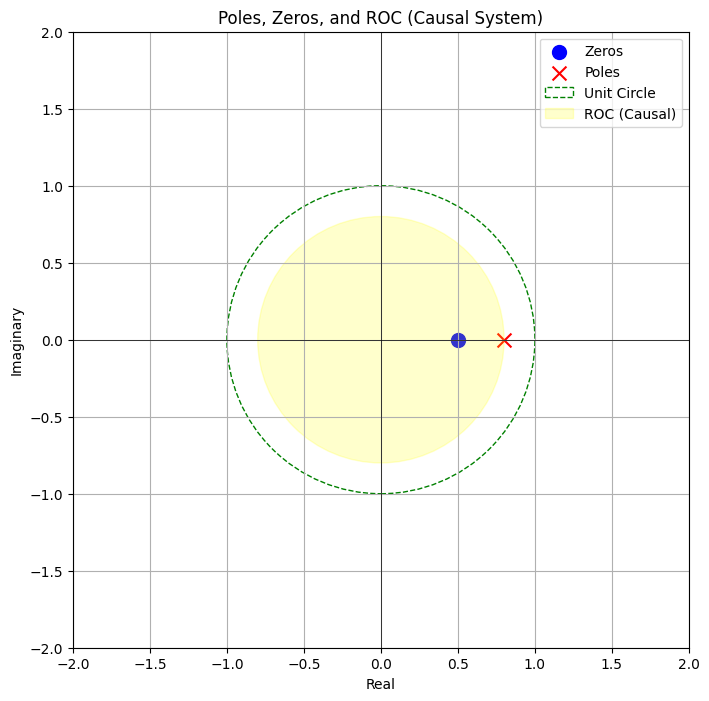

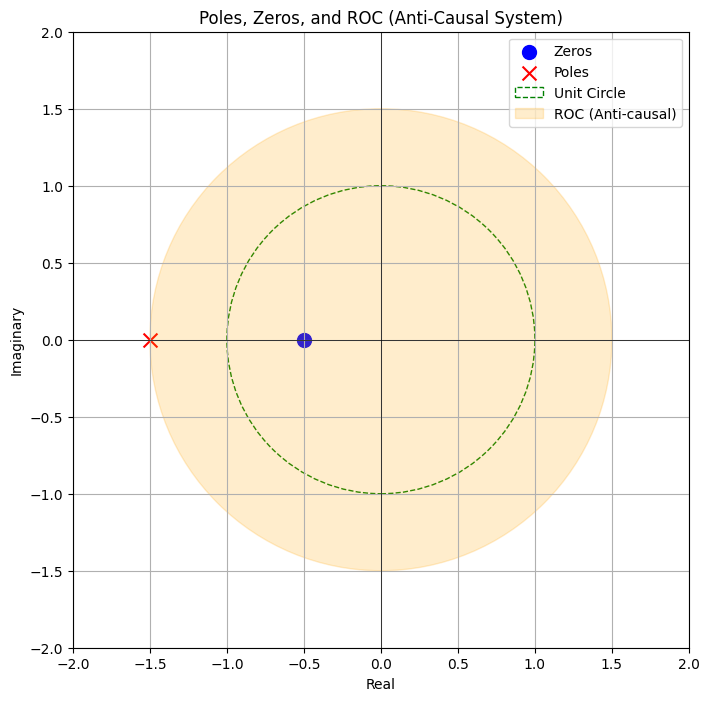

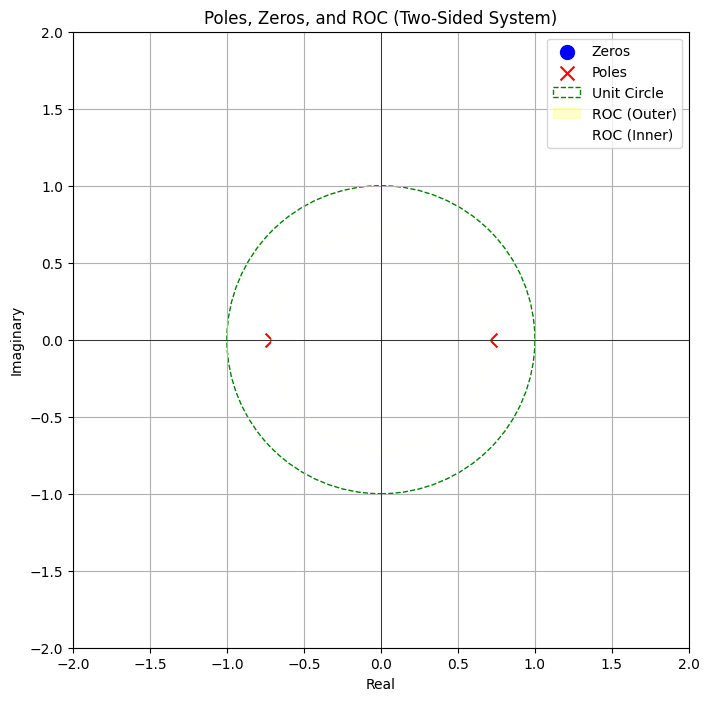

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

# Define transfer functions for causal, anti-causal, and two-sided systems
systems = {
    'causal': {
        'num': [1, -0.5],  # Causal system numerator
        'den': [1, -0.8],  # Causal system denominator
        'type': 'Causal'
    },
    'anti-causal': {
        'num': [1, 0.5],  # Anti-causal system numerator
        'den': [1, 1.5],  # Anti-causal system denominator
        'type': 'Anti-Causal'
    },
    'two-sided': {
        'num': [1, -0.7, 0.2],  # Two-sided system numerator
        'den': [1, 0, -0.5],    # Two-sided system denominator
        'type': 'Two-Sided'
    }
}

# Loop over all systems to visualize poles, zeros, and ROC
for key, sys in systems.items():
    num = sys['num']
    den = sys['den']

    # Create the discrete transfer function system
    system = signal.dlti(num, den, dt=1)

    # Get poles and zeros of the system
    zeros, poles = system.zeros, system.poles

    # Plot the poles and zeros
    plt.figure(figsize=(8, 8))
    plt.scatter(np.real(zeros), np.imag(zeros), label='Zeros', color='blue', s=100, marker='o')
    plt.scatter(np.real(poles), np.imag(poles), label='Poles', color='red', s=100, marker='x')

    # Plot the unit circle (boundary of ROC in Z-plane)
    unit_circle = plt.Circle((0, 0), 1, color='green', fill=False, linestyle='--', label='Unit Circle')
    plt.gca().add_artist(unit_circle)

    # Determine ROC based on the system type (causal, anti-causal, or two-sided)
    outermost_pole = np.max(np.abs(poles))
    innermost_pole = np.min(np.abs(poles))

    if sys['type'] == 'Causal':
        # ROC for causal system (outside the outermost pole)
        roc_circle_causal = plt.Circle((0, 0), outermost_pole, color='yellow', fill=True, alpha=0.2, label='ROC (Causal)')
        plt.gca().add_artist(roc_circle_causal)

    elif sys['type'] == 'Anti-Causal':
        # ROC for anti-causal system (inside the innermost pole)
        roc_circle_anticausal = plt.Circle((0, 0), innermost_pole, color='orange', fill=True, alpha=0.2, label='ROC (Anti-causal)')
        plt.gca().add_artist(roc_circle_anticausal)

    else:  # Two-Sided System
        # ROC for two-sided system (between innermost and outermost poles)
        roc_circle_two_sided_outer = plt.Circle((0, 0), outermost_pole, color='yellow', fill=True, alpha=0.2, label='ROC (Outer)')
        roc_circle_two_sided_inner = plt.Circle((0, 0), innermost_pole, color='white', fill=True, alpha=1.0, label='ROC (Inner)')
        plt.gca().add_artist(roc_circle_two_sided_outer)
        plt.gca().add_artist(roc_circle_two_sided_inner)

    # Set the axis limits
    plt.xlim([-2, 2])
    plt.ylim([-2, 2])

    # Label the plot
    plt.axhline(0, color='black', lw=0.5)
    plt.axvline(0, color='black', lw=0.5)
    plt.xlabel('Real')
    plt.ylabel('Imaginary')
    plt.title(f'Poles, Zeros, and ROC ({sys["type"]} System)')
    plt.legend()
    plt.grid(True)
    plt.gca().set_aspect('equal')

    # Show the plot for each system type
    plt.show()


# **Questions:**

**System Type and ROC:**

1. What happens to the ROC when you modify the system to be causal vs. anti-causal?

Both provide various results and behave differently when the system is modified. The ROC for the given causal system is outside the outermost pole. If the unit circle is contained in the ROC of the system, it is considered causal; if not, the system is stable. Given that the ROC stretches from the furthest pole outward to infinity, this behavior guarantees system stability if all of the poles are inside the unit circle. The result is: Poles: |z| = 0.8,The region is outside of ROC. Given that the unit circle (|z| = 1) is inside the ROC, it is implied that the system is causal and stable. When it comes to Anti-casual, the origin is included in the ROC, which is located within the innermost pole, and the system is stable if it excludes the unit circle.


2. For the two-sided system, how is the ROC different from the causal and anti-causal systems?

Between the innermost and outermost poles is the ROC. Instead of being entirely inside or outside the poles as in causal or anti-causal systems, the ROC is confined by both the most largest and smallest poles. The unit circle must be inside the ROC for the system to be stable. A bound zone is created in the Z-plane by the ROC, which is located between the poles. Because the impulse response of the system has both causal and anti-causal components, it is non-zero for both positive and negative indices. ROC lies between the poles, with the largest and smallest poles enclosing it.

**Stability:**

1. Check if the system is stable by looking at the poles. Are all poles inside the unit circle?

For the Causal System, the Numerator is [1,−0.5], and the Denominator [1,−0.8] , the poles: at z=0.8. ∣ 𝑧 ∣ = 0.8, since ∣z∣=0.8 is inside the unit circle, the system is stable since the pole is inside the unit circle. For the Anti-Causal System, the Numerator is [1,0.5], the Denominator: [1,1.5], the Poles: at z= − 1.5. Since ∣ 𝑧 ∣ = 1.5 this is outside the unit circle, the system is unstable because the pole is outside the unit circle. For the Two-Sided System, the Numerator: [1,−0.7,0.2], the Denominator: [1,0,−0.5], Solving the denominator 𝑧^2 − 0.5 = 0, we get poles at 𝑧 = 0.707 , and z = -0.707, Both ∣z∣=0.707, which are inside the unit circle, and this system is stable because both poles are inside the unit circle.


2. If the system is unstable, what changes can you make to stabilize it?

Modify the Denominator Coefficients, since the poles are determined by the denominator of the transfer function. We can do this by reducing the magnitude of the poles, to ensure that they are inside of the unit circle. We can also introduce damping into the system to help stabilize it. Lastly, we can manually place the poles inside the unit circle.


**ROC Region:**

1. How does changing the denominator (poles) affect the ROC?
The poles are pushed away from the origin (nearer to or beyond the unit circle) if the denominator changes, the ROC decreases, and the system loses stability. Additionally, the ROC grows larger as it extends from the outermost pole to infinity if the poles are brought closer to the origin (within unit circle).

2. How does changing the numerator (zeros) affect the system's response but not the ROC?

The transfer function's zeros are determined by the numerator coefficients. Zeros affect the way the system reacts to various input signals. Specifically, the numerator affects the Magnitude Response, Phase Response, Frequency Response. Additionally, another thing to take in mide that changing the numerator does not alter the locations of the poles. On the other hand, changing the zeros enables the output behavior of the system to be adjusted, this is helpful in signal processing and feedback control applications.